In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
import plotly
import mplfinance as mpf
import datetime

In [2]:
key = 'a1c3c823b6d7945ad4862f94025b0940295fd8c4'

In [3]:
#Load Data
company = 'AAPL'
start = dt.datetime(2012,1,12)
end = dt.datetime(2020,1,1)

df = web.DataReader(company, 'yahoo', start, end)
data = df.filter(['Close'])

In [4]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-11,15.101786,14.975357,15.095714,15.091071,215084800.0,12.957439
2012-01-12,15.103571,14.955357,15.081429,15.049643,212587200.0,12.921870
2012-01-13,15.016071,14.952143,14.989286,14.993214,226021600.0,12.873419
2012-01-17,15.213929,15.105714,15.150000,15.167857,242897200.0,13.023372
2012-01-18,15.338214,15.225000,15.248571,15.325357,276791200.0,13.158601


In [5]:
data.tail()

,Close
Date,
2019-12-24,71.067497
2019-12-26,72.477501
2019-12-27,72.449997
2019-12-30,72.879997
2019-12-31,73.412498


In [6]:
#DATA PREPROCESSING SECTION 

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
data = scaler.fit_transform(np.array(data).reshape(-1,1))

In [9]:
data.shape

(2006, 1)

In [10]:
training_size = int(len(data)*0.65)
test_size = len(data) - training_size
train_data, test_data = data[0: training_size, :], data[training_size: len(data), :1]

In [11]:
training_size, test_size

(1303, 703)

In [12]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
#reshape data into X = t, t+1, t+2, t+3 and t+4

time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [14]:
print(x_train.shape), print(y_train.shape)

(1202, 100)
(1202,)


(None, None)

In [15]:
print(x_test.shape), print(y_test.shape)

(602, 100)
(602,)


(None, None)

In [16]:
# STACKED LSTM 

In [17]:
#reshape data for the nn. The shape should be 3D
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1],1)

In [18]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [19]:
#CREATING AN LSTM MODEL
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [20]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.fit(x_train, y_train,
          validation_data=(x_test, y_test), 
          epochs=100,
        batch_size = 64, 
          verbose = 1
         )

Epoch 1/100
19/19 [==============================] - 8s 122ms/step - loss: 0.0105 - val_loss: 0.0123
Epoch 2/100
19/19 [==============================] - 1s 28ms/step - loss: 0.0011 - val_loss: 0.0021
Epoch 3/100
19/19 [==============================] - 1s 28ms/step - loss: 3.9504e-04 - val_loss: 0.0033
Epoch 4/100
19/19 [==============================] - 1s 28ms/step - loss: 3.3875e-04 - val_loss: 0.0026
Epoch 5/100
19/19 [==============================] - 1s 28ms/step - loss: 3.2646e-04 - val_loss: 0.0021
Epoch 6/100
19/19 [==============================] - 1s 28ms/step - loss: 3.0486e-04 - val_loss: 0.0020
Epoch 7/100
19/19 [==============================] - 1s 28ms/step - loss: 2.9718e-04 - val_loss: 0.0016
Epoch 8/100
19/19 [==============================] - 1s 28ms/step - loss: 3.0559e-04 - val_loss: 0.0022
Epoch 9/100
19/19 [==============================] - 1s 29ms/step - loss: 2.6762e-04 - val_loss: 0.0015
Epoch 10/100
19/19 [==============================] - 1s 28ms/step - lo

19/19 [==============================] - 1s 28ms/step - loss: 8.5853e-05 - val_loss: 6.5757e-04
Epoch 78/100
19/19 [==============================] - 1s 28ms/step - loss: 9.0740e-05 - val_loss: 4.1880e-04
Epoch 79/100
19/19 [==============================] - 1s 28ms/step - loss: 8.1008e-05 - val_loss: 3.6985e-04
Epoch 80/100
19/19 [==============================] - 1s 28ms/step - loss: 8.2793e-05 - val_loss: 3.4174e-04
Epoch 81/100
19/19 [==============================] - 1s 28ms/step - loss: 8.5111e-05 - val_loss: 3.1867e-04
Epoch 82/100
19/19 [==============================] - 1s 28ms/step - loss: 7.5905e-05 - val_loss: 3.1977e-04
Epoch 83/100
19/19 [==============================] - 1s 28ms/step - loss: 8.4537e-05 - val_loss: 2.8560e-04
Epoch 84/100
19/19 [==============================] - 1s 28ms/step - loss: 8.0583e-05 - val_loss: 4.2943e-04
Epoch 85/100
19/19 [==============================] - 1s 28ms/step - loss: 7.8276e-05 - val_loss: 2.8748e-04
Epoch 86/100
19/19 [============

In [23]:
import tensorflow as tf
tf.__version__

'2.4.0'

In [24]:
## Prediction and performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [25]:
# convert normalized values into original values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [26]:
# cal rmse perf metrics
import math 
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

24.78452329766081

In [27]:
print(x_test.shape,x_train.shape, train_predict.shape,test_predict.shape)

(602, 100, 1) (1202, 100, 1) (1202, 1) (602, 1)


In [28]:
##plotting
look_back = 100
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back: len(train_predict)+look_back,:] = train_predict

#shift test preds for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(data)-1, :] = test_predict


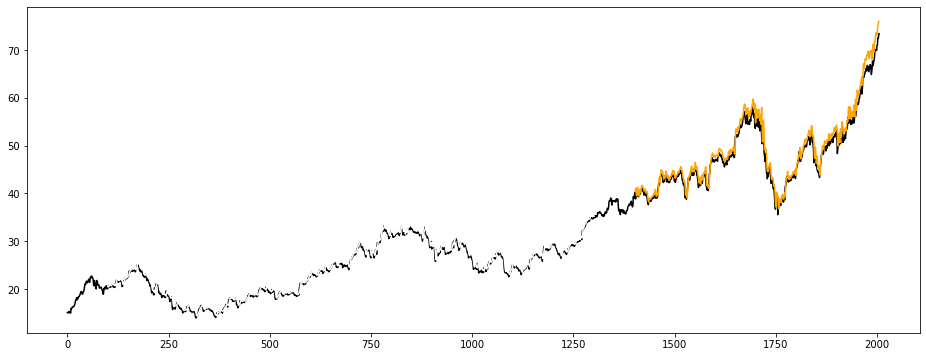

In [29]:
plt.figure(figsize=(16,6))
plt.plot(scaler.inverse_transform(data), color = 'black')
plt.plot(trainPredictPlot, color = 'white')
plt.plot(testPredictPlot, color = 'orange')
plt.show()

In [30]:
## predict for the future 30 days
len(test_data)

703

In [31]:
x_input = test_data[503:].reshape(1,-1)
x_input.shape

(1, 200)

In [32]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [33]:
# demonstrate for the next 30 days
from numpy import array

lst_op = []
n_steps = 200
i = 0

while(i<30):
    if(len(temp_input)>200):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        
        yhat = model.predict(x_input, verbose = 0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input = temp_input[1:]
        lst_op.extend(yhat.tolist())
        i+=1
        
    else:
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose = 0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_op.extend(yhat.tolist())
        i+=1
        
print(lst_op)

[1.058059]
201
1 day input [0.55650385 0.58563861 0.56865386 0.55894227 0.55074412 0.55780713
 0.55885817 0.56402926 0.56945266 0.5811402  0.58673173 0.58816113
 0.59366856 0.60670146 0.60417894 0.60888757 0.60186665 0.60153031
 0.6030438  0.6031279  0.61944004 0.62250906 0.62532583 0.63772807
 0.63638278 0.62847895 0.62435889 0.62566217 0.6090978  0.65050874
 0.644749   0.65567983 0.64193223 0.6183049  0.61847304 0.60930802
 0.59442528 0.54624571 0.55860593 0.5681073  0.56457582 0.56003533
 0.53518876 0.54994538 0.53388549 0.52076855 0.51786767 0.51475657
 0.51118308 0.51505089 0.5014715  0.49403013 0.52068445 0.53287647
 0.54414363 0.56487008 0.57508621 0.58446145 0.5818549  0.58168669
 0.57575889 0.58059364 0.59976457 0.59732615 0.6040108  0.60115195
 0.60031113 0.58765665 0.6054402  0.60518796 0.59753637 0.61279747
 0.61775834 0.62482135 0.62406457 0.60636512 0.61149419 0.61986042
 0.61363829 0.62015474 0.62818469 0.62519971 0.62036496 0.63007655
 0.61716976 0.63663502 0.64344572 0

4 day output [[1.2597288]]
5 day input [0.55074412 0.55780713 0.55885817 0.56402926 0.56945266 0.5811402
 0.58673173 0.58816113 0.59366856 0.60670146 0.60417894 0.60888757
 0.60186665 0.60153031 0.6030438  0.6031279  0.61944004 0.62250906
 0.62532583 0.63772807 0.63638278 0.62847895 0.62435889 0.62566217
 0.6090978  0.65050874 0.644749   0.65567983 0.64193223 0.6183049
 0.61847304 0.60930802 0.59442528 0.54624571 0.55860593 0.5681073
 0.56457582 0.56003533 0.53518876 0.54994538 0.53388549 0.52076855
 0.51786767 0.51475657 0.51118308 0.51505089 0.5014715  0.49403013
 0.52068445 0.53287647 0.54414363 0.56487008 0.57508621 0.58446145
 0.5818549  0.58168669 0.57575889 0.58059364 0.59976457 0.59732615
 0.6040108  0.60115195 0.60031113 0.58765665 0.6054402  0.60518796
 0.59753637 0.61279747 0.61775834 0.62482135 0.62406457 0.60636512
 0.61149419 0.61986042 0.61363829 0.62015474 0.62818469 0.62519971
 0.62036496 0.63007655 0.61716976 0.63663502 0.64344572 0.64273103
 0.6357942  0.63882119 0.6

8 day output [[1.4404298]]
9 day input [0.56945266 0.5811402  0.58673173 0.58816113 0.59366856 0.60670146
 0.60417894 0.60888757 0.60186665 0.60153031 0.6030438  0.6031279
 0.61944004 0.62250906 0.62532583 0.63772807 0.63638278 0.62847895
 0.62435889 0.62566217 0.6090978  0.65050874 0.644749   0.65567983
 0.64193223 0.6183049  0.61847304 0.60930802 0.59442528 0.54624571
 0.55860593 0.5681073  0.56457582 0.56003533 0.53518876 0.54994538
 0.53388549 0.52076855 0.51786767 0.51475657 0.51118308 0.51505089
 0.5014715  0.49403013 0.52068445 0.53287647 0.54414363 0.56487008
 0.57508621 0.58446145 0.5818549  0.58168669 0.57575889 0.58059364
 0.59976457 0.59732615 0.6040108  0.60115195 0.60031113 0.58765665
 0.6054402  0.60518796 0.59753637 0.61279747 0.61775834 0.62482135
 0.62406457 0.60636512 0.61149419 0.61986042 0.61363829 0.62015474
 0.62818469 0.62519971 0.62036496 0.63007655 0.61716976 0.63663502
 0.64344572 0.64273103 0.6357942  0.63882119 0.6469772  0.64319349
 0.66110316 0.64172201 0

12 day output [[1.6165503]]
13 day input [0.59366856 0.60670146 0.60417894 0.60888757 0.60186665 0.60153031
 0.6030438  0.6031279  0.61944004 0.62250906 0.62532583 0.63772807
 0.63638278 0.62847895 0.62435889 0.62566217 0.6090978  0.65050874
 0.644749   0.65567983 0.64193223 0.6183049  0.61847304 0.60930802
 0.59442528 0.54624571 0.55860593 0.5681073  0.56457582 0.56003533
 0.53518876 0.54994538 0.53388549 0.52076855 0.51786767 0.51475657
 0.51118308 0.51505089 0.5014715  0.49403013 0.52068445 0.53287647
 0.54414363 0.56487008 0.57508621 0.58446145 0.5818549  0.58168669
 0.57575889 0.58059364 0.59976457 0.59732615 0.6040108  0.60115195
 0.60031113 0.58765665 0.6054402  0.60518796 0.59753637 0.61279747
 0.61775834 0.62482135 0.62406457 0.60636512 0.61149419 0.61986042
 0.61363829 0.62015474 0.62818469 0.62519971 0.62036496 0.63007655
 0.61716976 0.63663502 0.64344572 0.64273103 0.6357942  0.63882119
 0.6469772  0.64319349 0.66110316 0.64172201 0.62318174 0.57828134
 0.59366856 0.602245 

16 day output [[1.7921638]]
17 day input [0.60186665 0.60153031 0.6030438  0.6031279  0.61944004 0.62250906
 0.62532583 0.63772807 0.63638278 0.62847895 0.62435889 0.62566217
 0.6090978  0.65050874 0.644749   0.65567983 0.64193223 0.6183049
 0.61847304 0.60930802 0.59442528 0.54624571 0.55860593 0.5681073
 0.56457582 0.56003533 0.53518876 0.54994538 0.53388549 0.52076855
 0.51786767 0.51475657 0.51118308 0.51505089 0.5014715  0.49403013
 0.52068445 0.53287647 0.54414363 0.56487008 0.57508621 0.58446145
 0.5818549  0.58168669 0.57575889 0.58059364 0.59976457 0.59732615
 0.6040108  0.60115195 0.60031113 0.58765665 0.6054402  0.60518796
 0.59753637 0.61279747 0.61775834 0.62482135 0.62406457 0.60636512
 0.61149419 0.61986042 0.61363829 0.62015474 0.62818469 0.62519971
 0.62036496 0.63007655 0.61716976 0.63663502 0.64344572 0.64273103
 0.6357942  0.63882119 0.6469772  0.64319349 0.66110316 0.64172201
 0.62318174 0.57828134 0.59366856 0.602245   0.62070124 0.61044316
 0.608299   0.64399228 

20 day output [[1.9634149]]
21 day input [0.61944004 0.62250906 0.62532583 0.63772807 0.63638278 0.62847895
 0.62435889 0.62566217 0.6090978  0.65050874 0.644749   0.65567983
 0.64193223 0.6183049  0.61847304 0.60930802 0.59442528 0.54624571
 0.55860593 0.5681073  0.56457582 0.56003533 0.53518876 0.54994538
 0.53388549 0.52076855 0.51786767 0.51475657 0.51118308 0.51505089
 0.5014715  0.49403013 0.52068445 0.53287647 0.54414363 0.56487008
 0.57508621 0.58446145 0.5818549  0.58168669 0.57575889 0.58059364
 0.59976457 0.59732615 0.6040108  0.60115195 0.60031113 0.58765665
 0.6054402  0.60518796 0.59753637 0.61279747 0.61775834 0.62482135
 0.62406457 0.60636512 0.61149419 0.61986042 0.61363829 0.62015474
 0.62818469 0.62519971 0.62036496 0.63007655 0.61716976 0.63663502
 0.64344572 0.64273103 0.6357942  0.63882119 0.6469772  0.64319349
 0.66110316 0.64172201 0.62318174 0.57828134 0.59366856 0.602245
 0.62070124 0.61044316 0.608299   0.64399228 0.61784244 0.61359627
 0.63360802 0.64979404 

24 day output [[2.1242697]]
25 day input [0.63638278 0.62847895 0.62435889 0.62566217 0.6090978  0.65050874
 0.644749   0.65567983 0.64193223 0.6183049  0.61847304 0.60930802
 0.59442528 0.54624571 0.55860593 0.5681073  0.56457582 0.56003533
 0.53518876 0.54994538 0.53388549 0.52076855 0.51786767 0.51475657
 0.51118308 0.51505089 0.5014715  0.49403013 0.52068445 0.53287647
 0.54414363 0.56487008 0.57508621 0.58446145 0.5818549  0.58168669
 0.57575889 0.58059364 0.59976457 0.59732615 0.6040108  0.60115195
 0.60031113 0.58765665 0.6054402  0.60518796 0.59753637 0.61279747
 0.61775834 0.62482135 0.62406457 0.60636512 0.61149419 0.61986042
 0.61363829 0.62015474 0.62818469 0.62519971 0.62036496 0.63007655
 0.61716976 0.63663502 0.64344572 0.64273103 0.6357942  0.63882119
 0.6469772  0.64319349 0.66110316 0.64172201 0.62318174 0.57828134
 0.59366856 0.602245   0.62070124 0.61044316 0.608299   0.64399228
 0.61784244 0.61359627 0.63360802 0.64979404 0.64983606 0.65942152
 0.6586648  0.6173799

28 day output [[2.2687397]]
29 day input [0.6090978  0.65050874 0.644749   0.65567983 0.64193223 0.6183049
 0.61847304 0.60930802 0.59442528 0.54624571 0.55860593 0.5681073
 0.56457582 0.56003533 0.53518876 0.54994538 0.53388549 0.52076855
 0.51786767 0.51475657 0.51118308 0.51505089 0.5014715  0.49403013
 0.52068445 0.53287647 0.54414363 0.56487008 0.57508621 0.58446145
 0.5818549  0.58168669 0.57575889 0.58059364 0.59976457 0.59732615
 0.6040108  0.60115195 0.60031113 0.58765665 0.6054402  0.60518796
 0.59753637 0.61279747 0.61775834 0.62482135 0.62406457 0.60636512
 0.61149419 0.61986042 0.61363829 0.62015474 0.62818469 0.62519971
 0.62036496 0.63007655 0.61716976 0.63663502 0.64344572 0.64273103
 0.6357942  0.63882119 0.6469772  0.64319349 0.66110316 0.64172201
 0.62318174 0.57828134 0.59366856 0.602245   0.62070124 0.61044316
 0.608299   0.64399228 0.61784244 0.61359627 0.63360802 0.64979404
 0.64983606 0.65942152 0.6586648  0.61737998 0.633566   0.62377031
 0.62952999 0.64416042 

In [34]:
day_new = np.arange(1,201)
day_pred = np.arange(201,231)

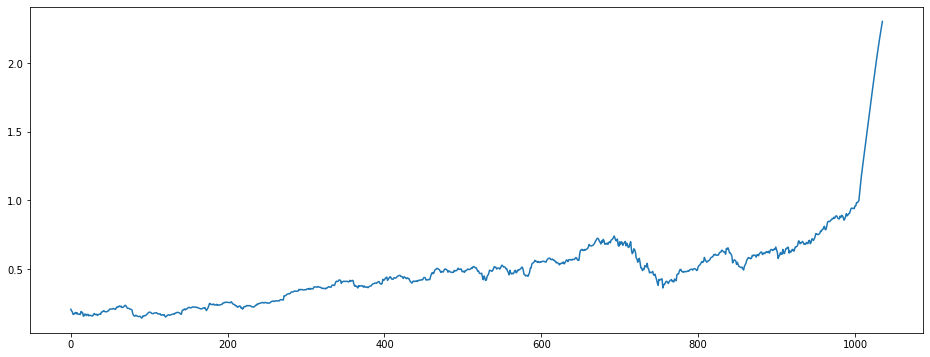

In [39]:
plt.figure(figsize=(16,6))
df2 = data.tolist()
df2.extend(lst_op)
plt.plot(df2[1000:])

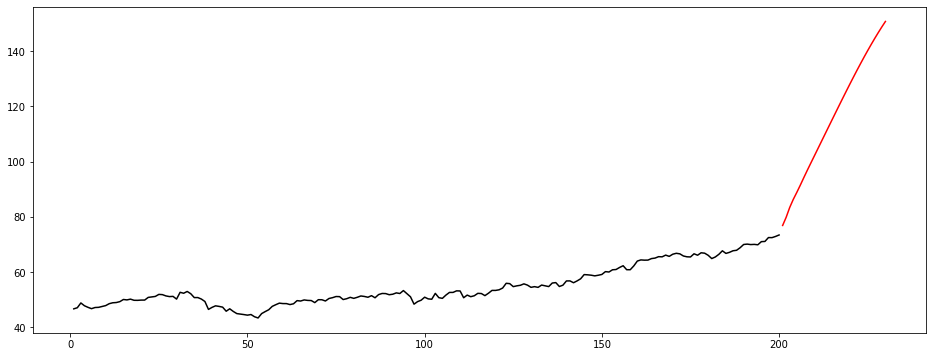

In [38]:
plt.figure(figsize=(16,6))
plt.plot(day_new, scaler.inverse_transform(data[1806:]), color = 'black')
plt.plot(day_pred, scaler.inverse_transform(lst_op), color = 'red')